In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv.zip')

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

1081

In [ ]:
TARGET = 'Class'

(-1.25, 1.25, -1.25, 1.25)

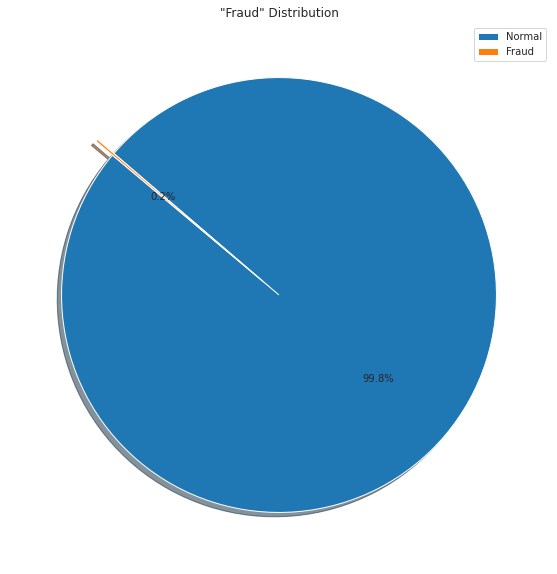

In [ ]:
# df[TARGET].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

plt.figure(figsize=(10,10))
explode = [0, 0.1]
plt.pie(df[TARGET].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Normal','Fraud'])
plt.title('"Fraud" Distribution')
plt.axis('off')

In [ ]:
df.groupby(TARGET).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
def heading(title, length=10):
    print('-'*length, title, '-'*length)
    
heading('Time Analysis')
heading('Fraud', 5)
print (df.Time[df[TARGET] == 1].describe())
print()
heading("Normal", 5)
print (df.Time[df[TARGET] == 0].describe())

---------- Time Analysis ----------
----- Fraud -----
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

----- Normal -----
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


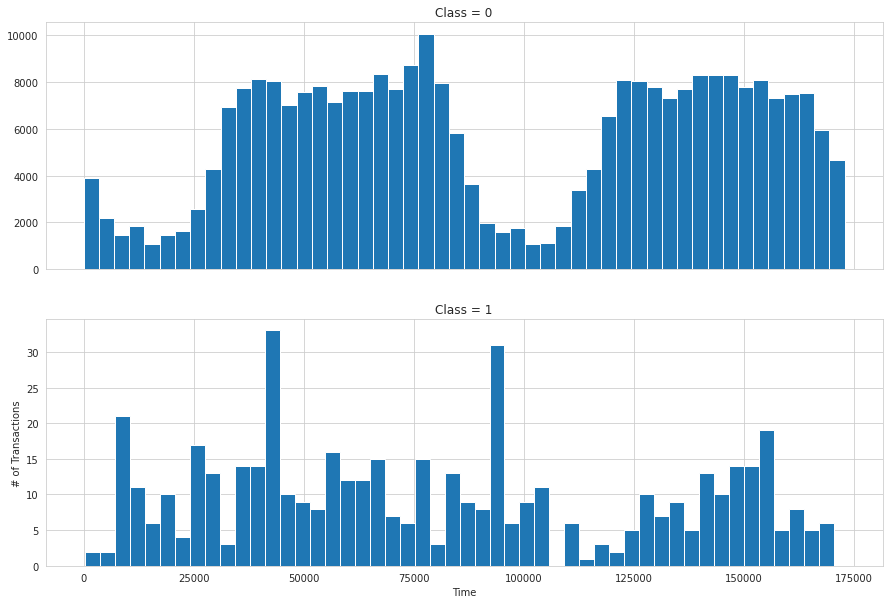

In [ ]:

def histogram(df, feature, target=TARGET, bins=50):
    vals = df[target].value_counts().index
    f, (fig1, fig2) = plt.subplots(2,1, sharex=True, figsize=(15, 10))

#     plt.yscale('log')
    fig1.hist(df[feature][df[target]==vals[0]], bins=bins)
    fig1.set_title(target + ' = ' + str(vals[0]))

    fig2.hist(df[feature][df[target]==vals[1]], bins=bins)
    fig2.set_title(target + ' = ' + str(vals[1]))

    plt.xlabel(feature)
    plt.ylabel('# of Transactions')
   

    plt.show()
    
histogram(df, 'Time', TARGET)

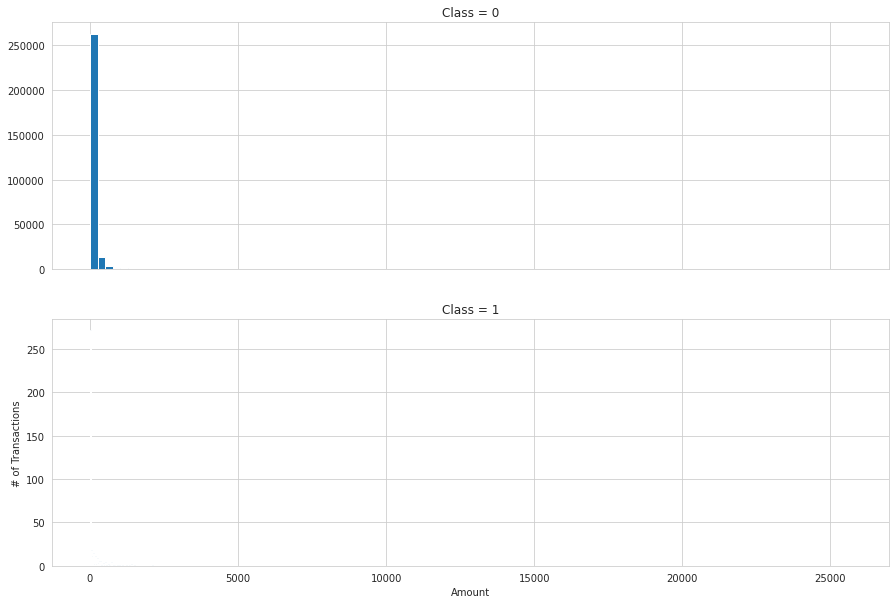

In [ ]:
histogram(df, 'Amount', TARGET, bins=100)

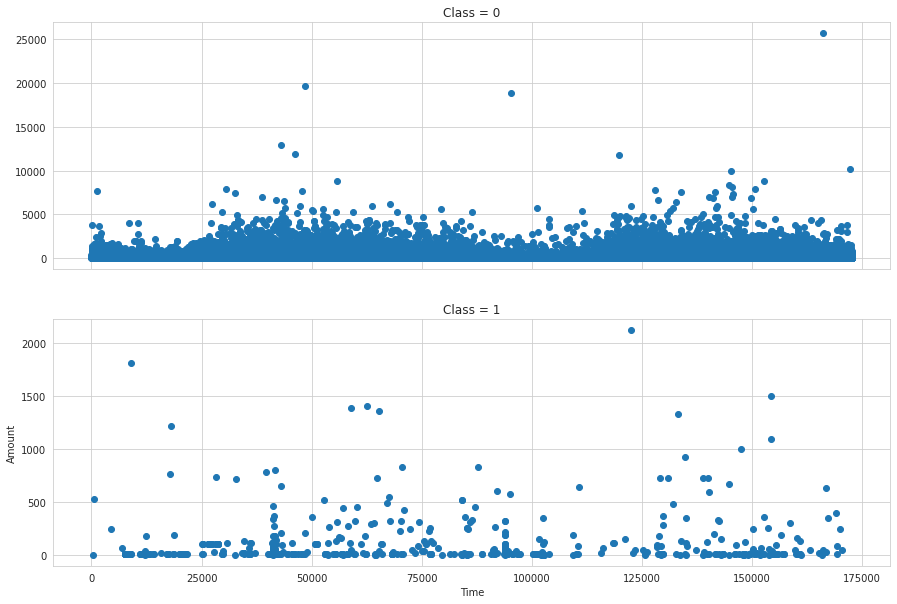

In [ ]:
def scatter(df, feature1, feature2, target=TARGET):
    vals = df[target].value_counts().index
    f, (fig1, fig2) = plt.subplots(2,1, sharex=True, figsize=(15, 10))

#     plt.yscale('log')
    fig1.scatter(df[feature1][df[target]==vals[0]], df[feature2][df[target]==vals[0]])
    fig1.set_title(target + ' = ' + str(vals[0]))

    fig2.scatter(df[feature1][df[target]==vals[1]], df[feature2][df[target]==vals[1]])
    fig2.set_title(target + ' = ' + str(vals[1]))

    plt.xlabel(feature1)
    plt.ylabel(feature2)
   

    plt.show()

scatter(df, 'Time', 'Amount')

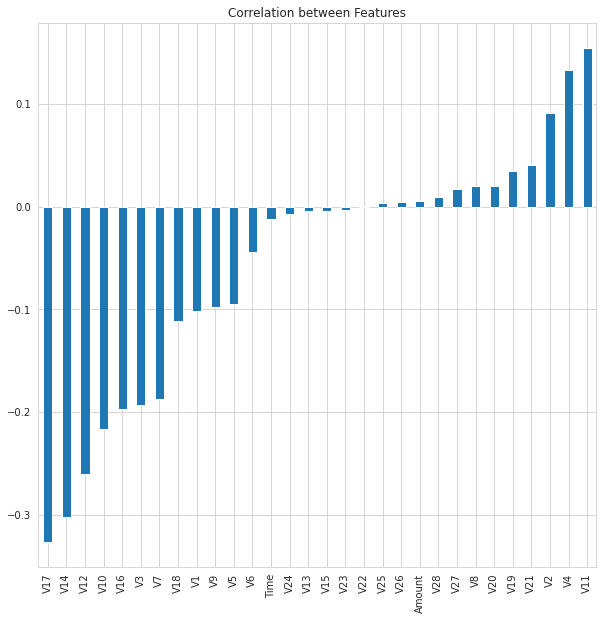

In [ ]:
def corr_features(df, target=TARGET, size=10):
    plt.figure(figsize=(size,size))
    corr = df.corr()[target].sort_values().drop(target)
    corr.plot(kind='bar')
    plt.title('Correlation between Features')
    plt.grid(True)
    plt.show()
    
corr_features(df)

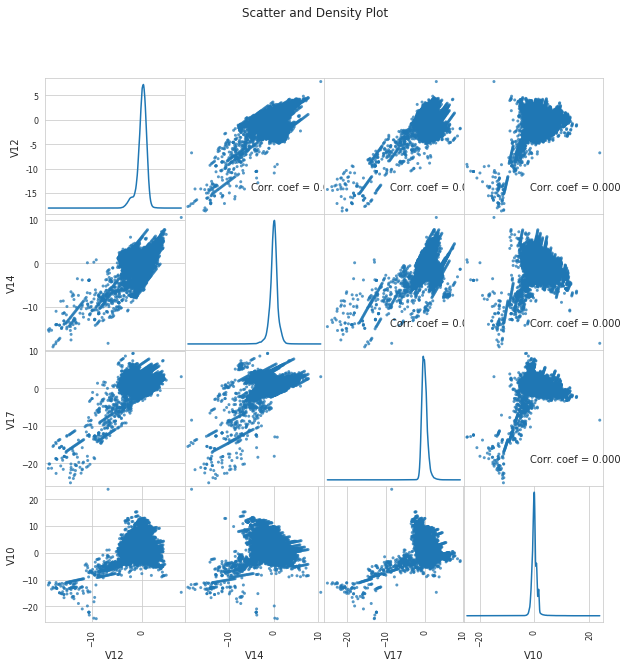

In [ ]:
def scatter(df, plotSize=10, columns=df.columns, textSize=10):
    df = df[columns]
#     df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
scatter(df,columns=['V12', 'V14', 'V17', 'V10'])

In [ ]:
df[df[TARGET]==0].duplicated().sum()

1062

In [ ]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
def outlier_report(df, cols=df.columns, whisker=3):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:
            res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T

outlier_report(df)

,lower_limit,upper_limit,iqr,# of outliers
V1,-7.628419,8.023687,2.236015,1994.0
V2,-4.805371,5.010545,1.402274,4453.0
V3,-6.643046,6.779877,1.917560,762.0
V4,-5.624584,5.519286,1.591981,479.0
V5,-4.602168,4.522497,1.303524,2321.0
V6,-4.268877,3.899146,1.166861,5389.0
V7,-3.927612,3.943972,1.124512,3051.0
V8,-1.816557,1.935273,0.535976,11285.0
V9,-4.363807,4.317849,1.240237,1077.0
V10,-3.503473,3.421971,0.989349,3208.0


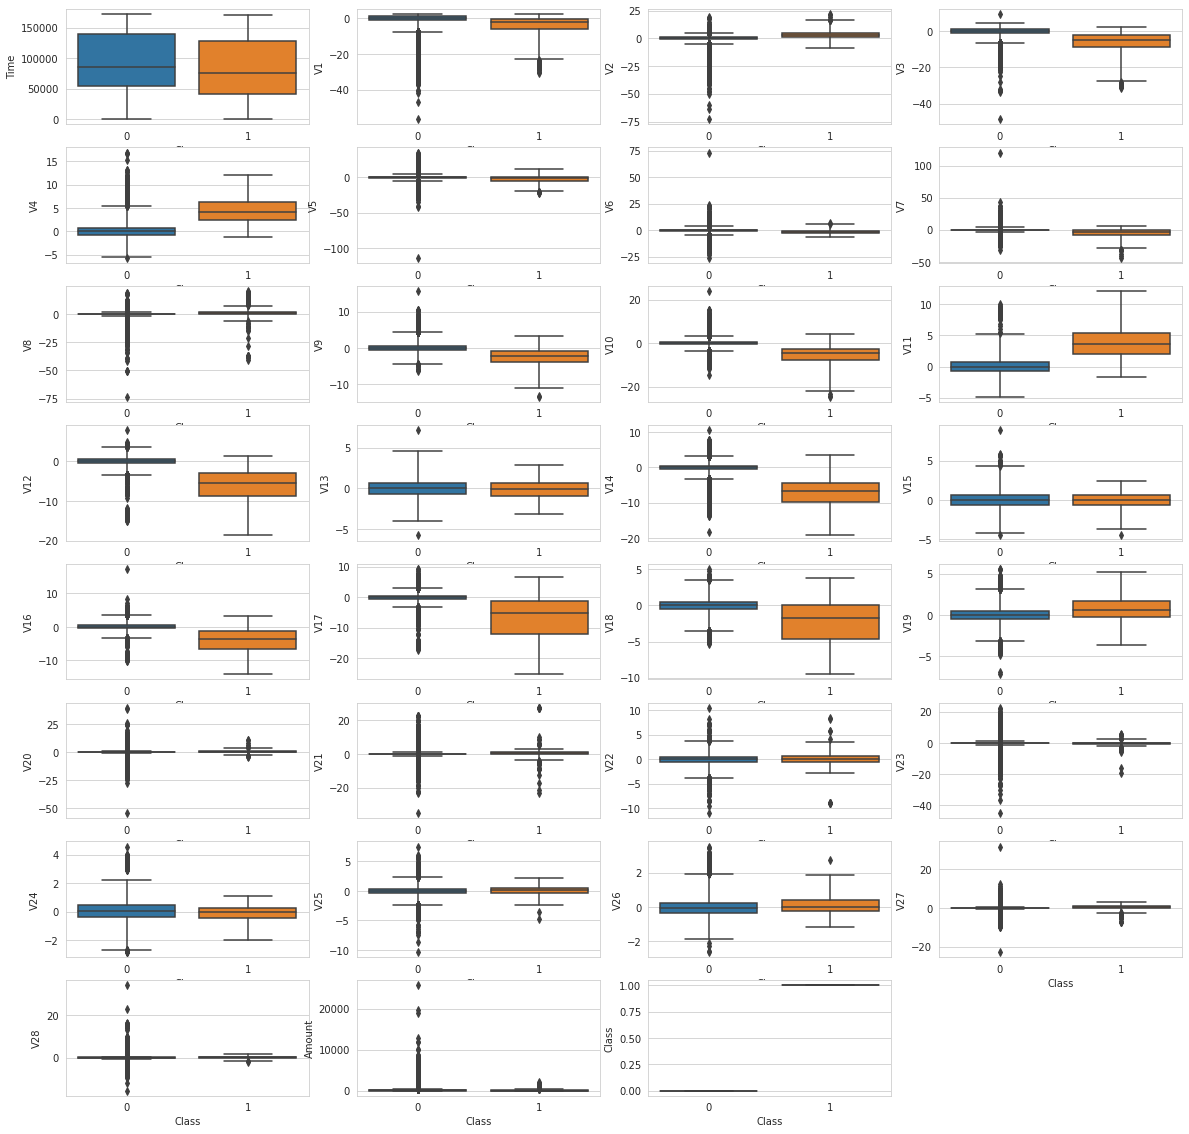

In [ ]:
def boxplot_all(df, target):
    index = 0
    plt.figure(figsize=(20,20))
    for feature in df.columns:
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(y = feature, x = target, data = df, whis=3)

boxplot_all(df, TARGET)

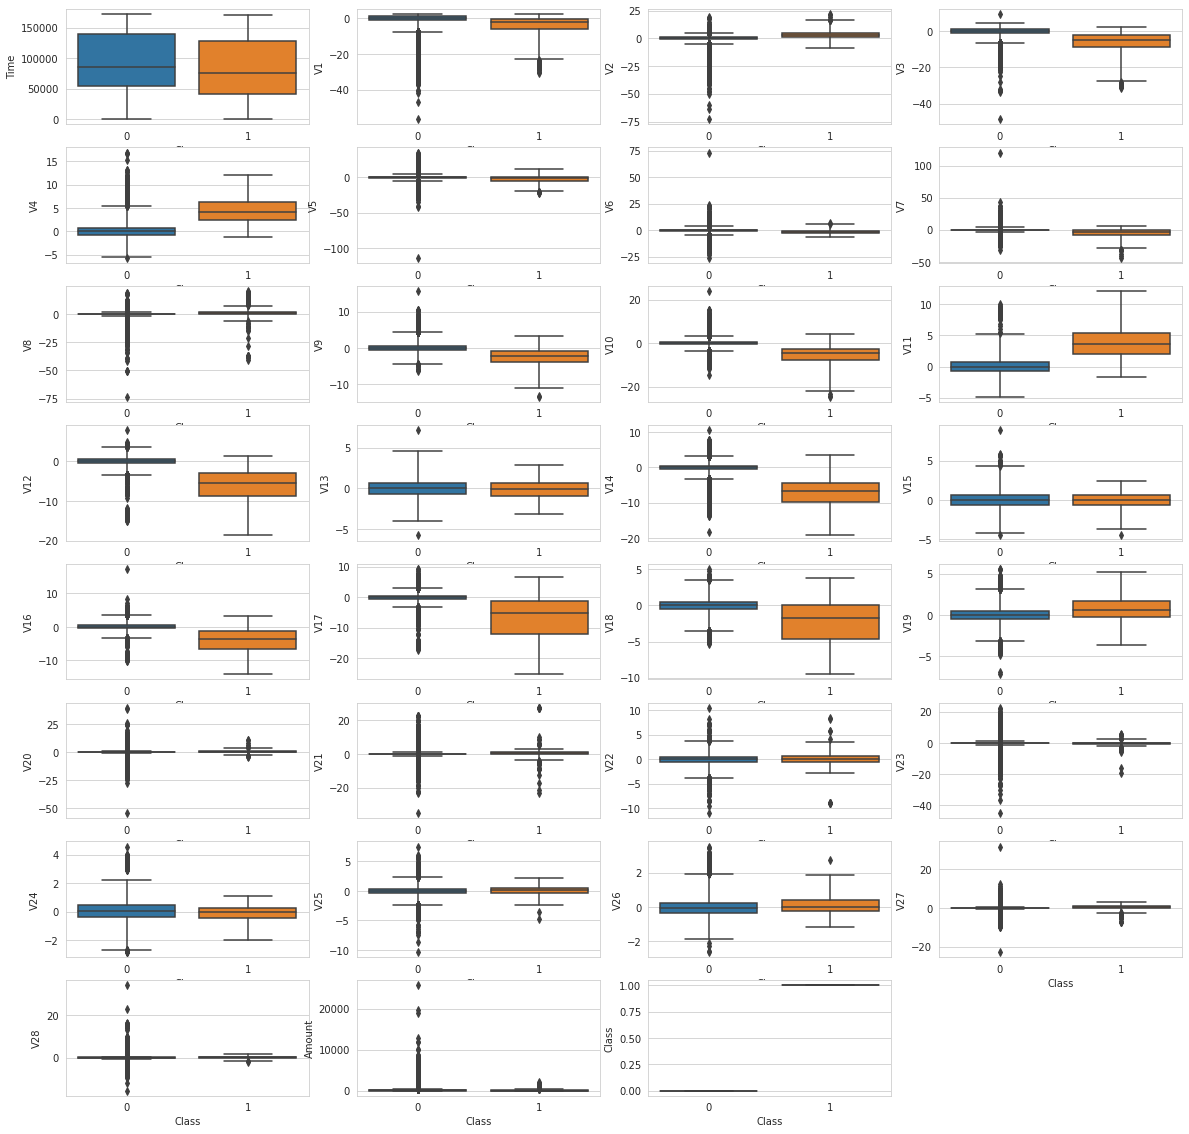

In [ ]:
def boxplot_all(df, target):
    index = 0
    plt.figure(figsize=(20,20))
    for feature in df.columns:
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(y = feature, x = target, data = df, whis=3)

boxplot_all(df, TARGET)

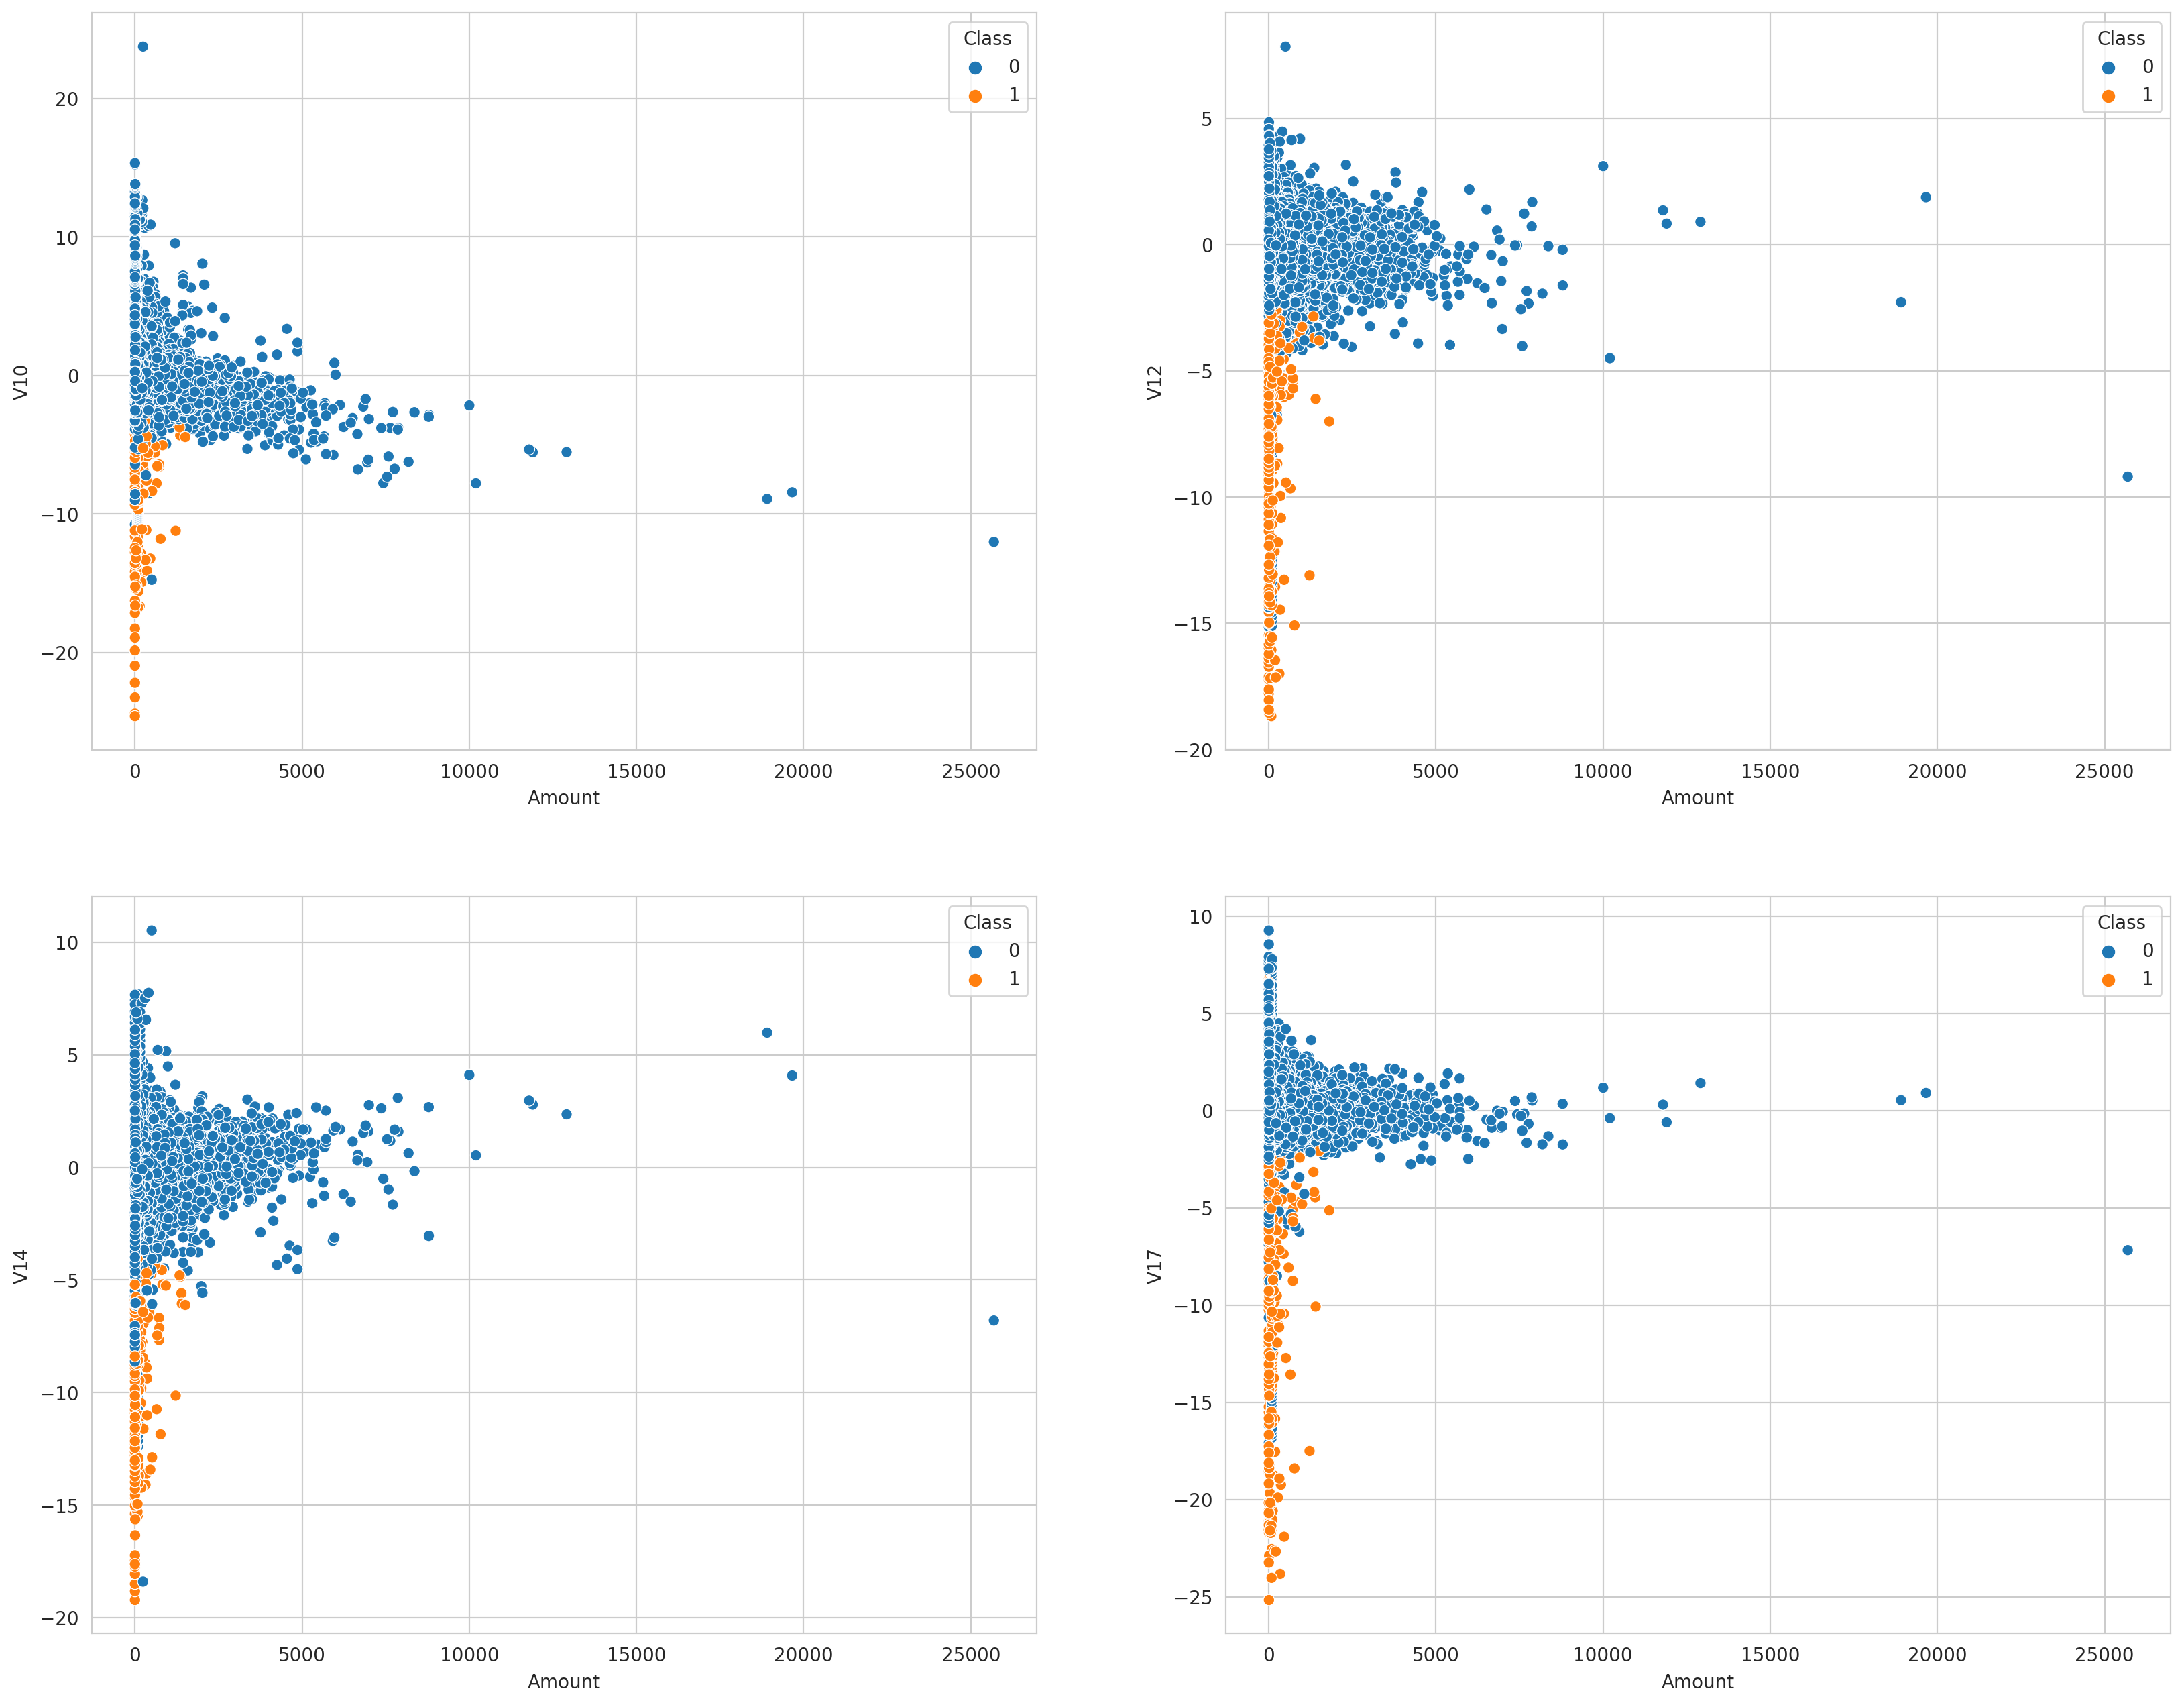

In [ ]:
def scatterplot(df, target, x, cols=df.columns):
    import math
    n = len(cols)
#     f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
    f, ax = plt.subplots(ncols=n, figsize=(n*5,n*4), dpi=200)

    index = 1
    for col in cols:
        plt.subplot(math.ceil(n/2),2,index)
        sns.scatterplot(data = df, x = x, y = col, hue = target,  palette='tab10')
        index += 1
    plt.show()
    
    
scatterplot(df, TARGET, x ='Amount', cols=['V10', 'V12', 'V14', 'V17'])

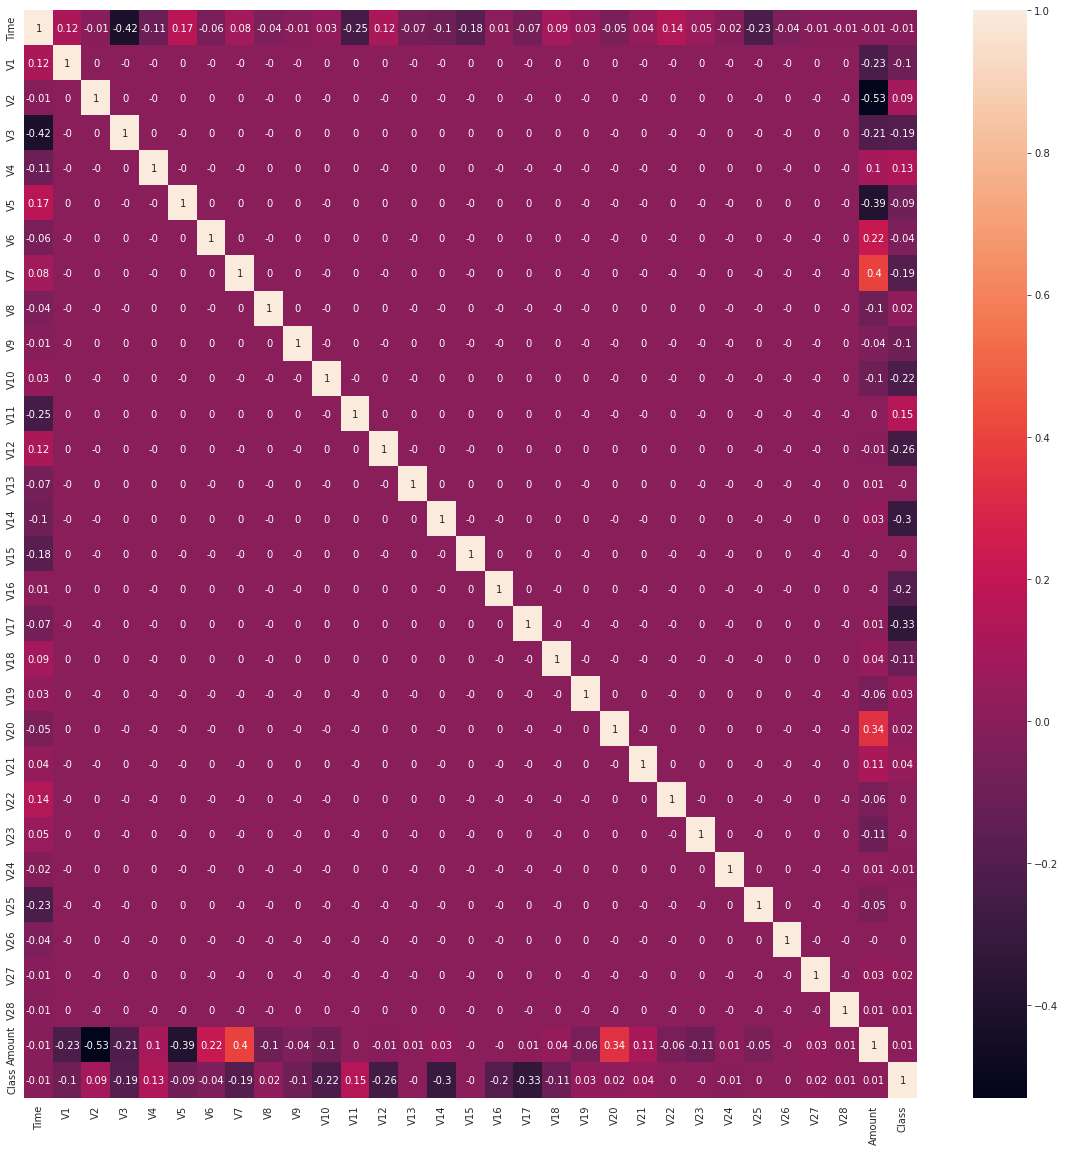

In [ ]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr().round(2), annot=True)

In [ ]:
def numerical_cols(data):
    return data.select_dtypes(['number'])
    #df.select_dtypes(include=np.number)
    
def overall_corr(data, col_target, prec=0.8):
    other_cols = numerical_cols(data).drop(columns = col_target).columns  #other than target
    hi_corr = {}
    cols = other_cols.copy()        
    for col1 in other_cols:
        cols = cols[1:]         #remove the first item
        for col2 in cols:
#             print(col1, col2)
            corr = data[col1].corr(data[col2])
            if corr >= prec:
                hi_corr[col1 + ' _ ' + col2] = corr
    if len(hi_corr):
        hi_corr = dict(sorted(hi_corr.items(), key=lambda item: item[1], reverse=True))
        print(pd.DataFrame.from_dict(hi_corr, orient='index', columns=['Corr']))
    else:
        print('No correlation between features. \nThreshold:', prec)
        
overall_corr(df[df[TARGET]==1], TARGET)

               Corr
V17 _ V18  0.971492
V16 _ V17  0.960153
V16 _ V18  0.944498
V1 _ V3    0.907875
V1 _ V7    0.897609
V1 _ V5    0.894968
V3 _ V5    0.883689
V3 _ V7    0.882312
V12 _ V16  0.881703
V9 _ V10   0.863966
V7 _ V10   0.859823
V12 _ V17  0.842796
V5 _ V7    0.839738
V10 _ V12  0.834331
V3 _ V10   0.818243
V10 _ V16  0.806637
V10 _ V17  0.803109


In [ ]:
df_bkp = df.copy()    # save unprocessed data to reuse

In [ ]:
X = df.drop([TARGET], axis=1)
y = df[TARGET]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

def eval_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Mathew's Corr Coefficient: ", matthews_corrcoef(y_test, y_pred))
    print("Cohen-Kappa Score:         ", cohen_kappa_score(y_test, y_pred))

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ('log', LogisticRegression())]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

In [ ]:
eval_metrics(pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[56851    13]
 [   34    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227419     32]
 [   142    252]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.64      0.74       394

    accuracy                           1.00    227845
   macro avg       0.94      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Mathew's Corr Coefficient:  0.7363585541572303
Cohen-Kappa Score:          0.7310213399471811


Cross-validate Logistic Regression


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
scoring = {"f1_Fraud" : make_scorer(f1_score, pos_label=1),
           "precision_Fraud" : make_scorer(precision_score,  pos_label=1),
           "recall_Fraud" : make_scorer(recall_score,  pos_label=1)}

# scoring = ['precision','recall','f1','accuracy']

operations = [('scaler',StandardScaler()),('log',LogisticRegression())]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Fraud           0.732370
test_precision_Fraud    0.878366
test_recall_Fraud       0.629615
dtype: float64

In [ ]:
class_weights = {0:1, 1:15}

operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]
pipe_model_weight = Pipeline(steps=operations)
pipe_model_weight.fit(X_train, y_train)
eval_metrics(pipe_model_weight, X_train, y_train, X_test, y_test)

Test_Set
[[56817    47]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.85      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.92      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227321    130]
 [    69    325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.82      0.77       394

    accuracy                           1.00    227845
   macro avg       0.86      0.91      0.88    227845
weighted avg       1.00      1.00      1.00    227845

Mathew's Corr Coefficient:  0.7348379443353067
Cohen-Kappa Score:          0.7275356245278455


Stratified K-fold Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold    # Modeli kaç parçaya ayırmak istiyorsak ona göre index numaraları belirler.

def CV_Stratified(n, model, X, y, optimal_threshold, random_state=42):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = random_state)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # Index no'ları her işlemden sonra sıfırlaması için.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')
    print(f'Threshold: {optimal_threshold:>10,.5f}')
    

CV_Stratified(10, pipe_model_weight, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.91%  std 0.02%
Precision-1   71.72%  std 4.81%
Recall-1      82.03%  std 6.05%
F1_score-1    76.37%  std 4.08%
Threshold:    0.50000


Resampling


SMOTE(Synthetic Minority Over Sampling Technique)

In [ ]:
df[TARGET].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
over = SMOTE(sampling_strategy={1: 1000}) 
under = RandomUnderSampler(sampling_strategy={0: 30000}) 

weights = {0:1, 1:1}
steps = [('over', over), ('under', under), 
              ("log", LogisticRegression(class_weight=weights, random_state=42))]

pipeline = imbpipeline(steps=steps)
pipeline.fit(X_train, y_train)

eval_metrics(pipeline, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test_Set
[[56692   172]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.86      0.47        98

    accuracy                           1.00     56962
   macro avg       0.66      0.93      0.74     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[226772    679]
 [    72    322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.32      0.82      0.46       394

    accuracy                           1.00    227845
   macro avg       0.66      0.91      0.73    227845
weighted avg       1.00      1.00      1.00    227845

Mathew's Corr Coefficient:  0.5291943209341904
Cohen-Kappa Score:          0.47326558343457104


Cross-validate Resampling

In [ ]:
steps = [('over', over), ('under', under), 
              ("log", LogisticRegression(class_weight=weights, random_state=42))]

model = imbpipeline(steps=steps)

CV = 10
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'recall', 'f1'], cv = CV)
df_scores = pd.DataFrame(scores, index = range(1, CV+1))
df_scores.mean()[2:]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


test_accuracy    0.996967
test_recall      0.822051
test_f1          0.489174
dtype: float64

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/prcurve.py:257: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  YellowbrickWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


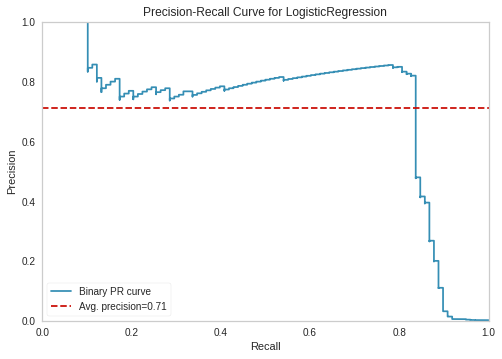

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
scoring = {"f1_Fraud" : make_scorer(f1_score, pos_label=1),
           "precision_Fraud" : make_scorer(precision_score,  pos_label=1),
           "recall_Fraud" : make_scorer(recall_score,  pos_label=1)}

steps = [('over', over), ('under', under), 
              ("log", LogisticRegression(class_weight=weights, random_state=42))]

model = imbpipeline(steps=steps)
CV = 10
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = CV)
df_scores = pd.DataFrame(scores, index = range(1, CV+1))
df_scores.mean()[2:]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


test_f1_Fraud           0.476415
test_precision_Fraud    0.339603
test_recall_Fraud       0.816859
dtype: float64

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/prcurve.py:257: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  YellowbrickWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


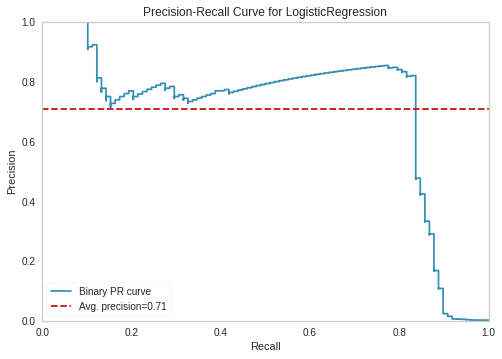

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
CV_Stratified(10, model, X_train, y_train, optimal_threshold=0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy      99.63%  std 0.06%
Precision-1   30.22%  std 4.26%
Recall-1      81.78%  std 5.83%
F1_score-1    43.95%  std 4.68%
Threshold:    0.50000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Random Forest with SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier

class_weights = {0: 1, 1: 1}

over = SMOTE(sampling_strategy={1: 1000})
under = RandomUnderSampler(sampling_strategy={0: 20000})

operations = [('o', over), ('u', under), ('rf', RandomForestClassifier(class_weight=class_weights, max_depth=7, random_state=42))]
rf_model = imbpipeline(steps=operations)
rf_model.fit(X_train, y_train)

eval_metrics(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56825    39]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.88      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227364     87]
 [    62    332]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.79      0.84      0.82       394

    accuracy                           1.00    227845
   macro avg       0.90      0.92      0.91    227845
weighted avg       1.00      1.00      1.00    227845

Mathew's Corr Coefficient:  0.7765939136654185
Cohen-Kappa Score:          0.7708584916926342


Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
features = ['V14', 'V17', 'V12', 'V10', 'V11']
X = df[features]
y = df[TARGET]

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
tf.random.set_seed(SEED)

model_ann = Sequential()

model_ann.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model_ann.add(Dense(15, activation = "relu"))
model_ann.add(Dense(1, activation = "sigmoid"))

model_ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5, restore_best_weights = True)


model_ann.fit(x = X_train, y = y_train, validation_split = 0.1, 
              batch_size = 32, epochs = 20, 
              callbacks=[early_stop], verbose=1)

Epoch 1/20
6409/6409 [==============================] - 15s 2ms/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 2/20
6409/6409 [==============================] - 14s 2ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 3/20
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 4/20
6409/6409 [==============================] - 14s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 5/20
6409/6409 [==============================] - 13s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 6/20
6409/6409 [==============================] - 14s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 7/20
6409/6409 [==============================] - 14s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0028 - val_ac

In [ ]:
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                180       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model_ann.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.009699,0.999249,0.002919,0.999605
1,0.003693,0.999361,0.003627,0.999473
2,0.003568,0.999356,0.003254,0.999342
3,0.003476,0.999371,0.002511,0.999605
4,0.003468,0.999395,0.002548,0.999561


In [ ]:
#0.1 test size
y_pred = (model_ann.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1781/1781 [==============================] - 2s 1ms/step
[[56844    20]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Saving the model for Future Inferences

model_json = model_ann.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    

model_ann.save("model.h5")